In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:

ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [37]:
ce5.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [38]:
ce5.duplicated().sum()

0

In [39]:
ce5['loggedtime']= ce5[0].apply(lambda x : x[:19])

In [40]:
ce5['jobname'] = ce5[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])

In [41]:
ce5['respoonseTime'] = ce5[3].apply(lambda x : x.split('.')[0][5:])

In [42]:
ce5['user'] = ce5[1].apply(lambda x : x[5:])

In [43]:
ce5['retry']= ce5[2].apply(lambda x : x[6:])

In [44]:
ce5['returncode']= ce5[4].apply(lambda x : x[11:])

In [45]:
ce5.isna().sum()

0                0
1                0
2                0
3                0
4                0
5                0
loggedtime       0
jobname          0
respoonseTime    0
user             0
retry            0
returncode       0
dtype: int64

In [46]:
#cleaned frame
ce5

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:15:39,sacct,0,0,0,0
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:18:08,sacct,0,0,0,0
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:22:48,sacct,0,0,0,0
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:25:13,sacct,0,0,0,0
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:31:01,sacct,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4770888,2021-10-07 21:58:06.738329,user 9203,retry 0,time 0.02677178382873535,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:06,squeue,0,9203,0,0
4770889,2021-10-07 21:58:15.931559,user 9201,retry 0,time 0.04166150093078613,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:15,squeue,0,9201,0,0
4770890,2021-10-07 21:58:48.900136,user 9221,retry 0,time 0.14348959922790527,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:48,squeue,0,9221,0,0
4770891,2021-10-07 21:59:11.314056,user 9203,retry 0,time 0.026599407196044922,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:59:11,squeue,0,9203,0,0


In [47]:
#Lets grab the cleaned columns.
ce5log_df = ce5.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [48]:
ce5log_date_returncode_group_df=ce5log_df.groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','returncode']]
ce5log_date_returncode_group_df

,loggedtime,returncode
0,2020-10-16 08:15:39,0
1,2020-10-16 08:18:08,0
2,2020-10-16 08:22:48,0
3,2020-10-16 08:25:13,0
4,2020-10-16 08:31:01,0
...,...,...
1767859,2021-10-07 21:58:06,0
1767860,2021-10-07 21:58:15,0
1767861,2021-10-07 21:58:48,0
1767862,2021-10-07 21:59:11,0


In [49]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_date_returncode_group_df['loggedtime'] = pd.to_datetime(ce5log_date_returncode_group_df['loggedtime'],errors='coerce')
ce5log_date_returncode_group_df

,loggedtime,returncode
0,2020-10-16 08:15:39,0
1,2020-10-16 08:18:08,0
2,2020-10-16 08:22:48,0
3,2020-10-16 08:25:13,0
4,2020-10-16 08:31:01,0
...,...,...
1767859,2021-10-07 21:58:06,0
1767860,2021-10-07 21:58:15,0
1767861,2021-10-07 21:58:48,0
1767862,2021-10-07 21:59:11,0


In [87]:
ce5log_date_returncode_group_df['date'] = ce5log_date_returncode_group_df['loggedtime'].dt.date
ce5log_date_returncode_group_df['returncode'] = ce5log_date_returncode_group_df['returncode'].astype('int')
ce5log_date_returncode_group_df

,loggedtime,returncode,date,modReturnCode
0,2020-10-16 08:15:39,0,2020-10-16,0
1,2020-10-16 08:18:08,0,2020-10-16,0
2,2020-10-16 08:22:48,0,2020-10-16,0
3,2020-10-16 08:25:13,0,2020-10-16,0
4,2020-10-16 08:31:01,0,2020-10-16,0
...,...,...,...,...
1767859,2021-10-07 21:58:06,0,2021-10-07,0
1767860,2021-10-07 21:58:15,0,2021-10-07,0
1767861,2021-10-07 21:58:48,0,2021-10-07,0
1767862,2021-10-07 21:59:11,0,2021-10-07,0


In [88]:
# ce5log_date_returncode_group_df['modReturnCode'] = ce5log_date_returncode_group_df['returncode'].apply(
#     lambda x : 0 if x != 0 and x!= 1 else x
# )
# ce5log_date_returncode_group_df

In [89]:
ce5log_date_returncode_group_df['date'] = pd.to_datetime(
    ce5log_date_returncode_group_df['date']
)
ce5log_date_returncode_group_df

,loggedtime,returncode,date,modReturnCode
0,2020-10-16 08:15:39,0,2020-10-16,0
1,2020-10-16 08:18:08,0,2020-10-16,0
2,2020-10-16 08:22:48,0,2020-10-16,0
3,2020-10-16 08:25:13,0,2020-10-16,0
4,2020-10-16 08:31:01,0,2020-10-16,0
...,...,...,...,...
1767859,2021-10-07 21:58:06,0,2021-10-07,0
1767860,2021-10-07 21:58:15,0,2021-10-07,0
1767861,2021-10-07 21:58:48,0,2021-10-07,0
1767862,2021-10-07 21:59:11,0,2021-10-07,0


In [115]:
checkdf = ce5log_date_returncode_group_df[(
    (ce5log_date_returncode_group_df['loggedtime'] >= '2021-08-01 06:48:00')
    &
    (ce5log_date_returncode_group_df['loggedtime'] <= '2021-08-31 06:48:49')
)]
checkdf

,loggedtime,returncode,date,modReturnCode
1332557,2021-08-01 06:48:42,0,2021-08-01,0
1332558,2021-08-01 06:48:55,0,2021-08-01,0
1332559,2021-08-01 06:49:01,0,2021-08-01,0
1332560,2021-08-01 06:49:57,0,2021-08-01,0
1332561,2021-08-01 06:50:04,0,2021-08-01,0
...,...,...,...,...
1556084,2021-08-31 06:47:06,0,2021-08-31,0
1556085,2021-08-31 06:47:19,0,2021-08-31,0
1556086,2021-08-31 06:48:10,0,2021-08-31,0
1556087,2021-08-31 06:48:20,0,2021-08-31,0


In [116]:
checkdf['returncode'].unique()

array([  0,   1, 140])

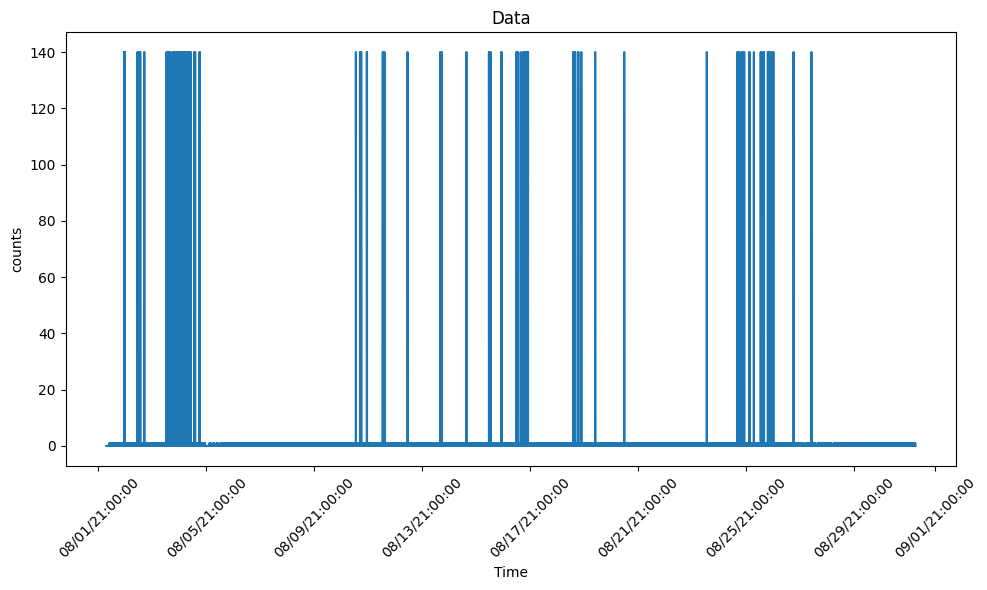

In [117]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['loggedtime'], checkdf['returncode'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())
#plt.set_xticks([0,1,140])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## below is specific to batch type

In [118]:
ce5log_df_sbatch = ce5log_df[ce5log_df['jobname'] == 'sbatch']

In [119]:
ce5log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
29,2020-10-16 08:32:25,9201,sbatch,0,0,0
30,2020-10-16 08:32:25,9201,sbatch,0,0,0
34,2020-10-16 08:32:53,9201,sbatch,0,0,0
35,2020-10-16 08:32:53,9201,sbatch,0,0,0
36,2020-10-16 08:32:53,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4770843,2021-10-07 21:44:59,9204,sbatch,0,0,0
4770868,2021-10-07 21:53:47,9204,sbatch,0,0,0
4770871,2021-10-07 21:54:51,9203,sbatch,0,0,0
4770873,2021-10-07 21:55:01,9203,sbatch,0,0,0


In [120]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_date_returncode_group_df=ce5log_df_sbatch[ce5log_df_sbatch['returncode'].astype('int') == 1].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
#ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [121]:
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [122]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [123]:
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','user'],ascending=[True,True])

In [124]:
ce5log_sbatch_date_returncode_group_df=ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df


,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [129]:
ce5log_sbatch_date_returncode_group_df.tail(60)

,loggedtime,count
34116,2021-09-24 07:42:26,2
34117,2021-09-24 07:42:27,2
34118,2021-09-24 07:48:43,4
34119,2021-09-24 07:54:40,2
34120,2021-09-24 07:56:44,4
34121,2021-09-24 07:59:11,6
34122,2021-09-24 07:59:23,1
34123,2021-09-24 07:59:24,2
34124,2021-09-24 08:21:17,2
34125,2021-09-24 08:21:33,3


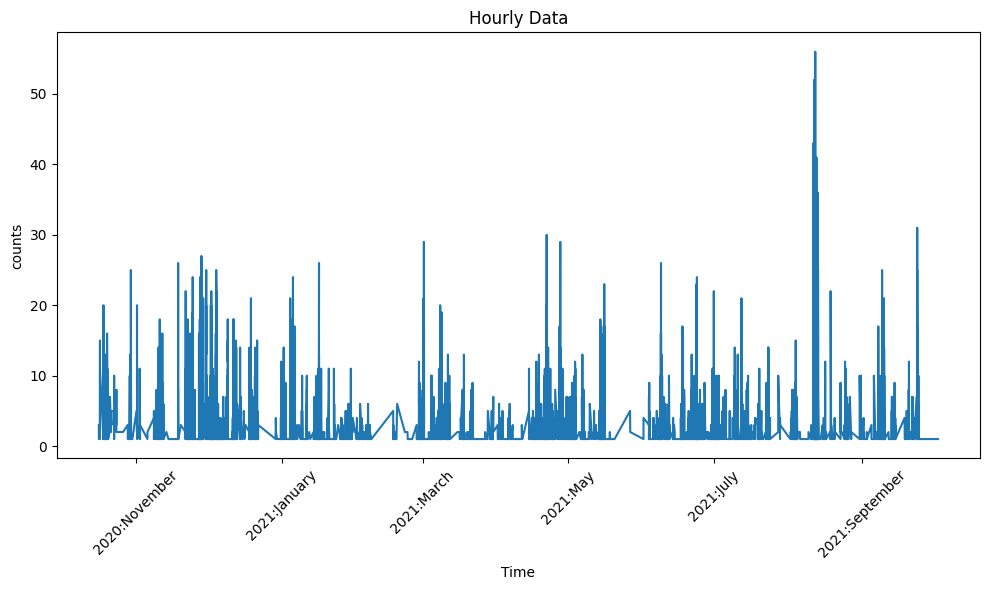

In [125]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce5log_sbatch_date_returncode_group_df['loggedtime'], ce5log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
oct2020= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-08-11'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-08-12'
)]
oct2020

,loggedtime,count
18848,2021-08-11 10:28:19,1
18849,2021-08-11 11:19:05,1
18850,2021-08-11 11:19:06,7
18851,2021-08-11 11:25:13,1
18852,2021-08-11 11:32:24,1
...,...,...
22050,2021-08-11 23:57:26,5
22051,2021-08-11 23:57:28,14
22052,2021-08-11 23:57:29,18
22053,2021-08-11 23:57:37,3


In [27]:
march2021= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-03-01'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-03-02'
)]
march2021

,loggedtime,count
10619,2021-03-01 00:11:34,2
10620,2021-03-01 00:11:45,3
10621,2021-03-01 00:11:51,6
10622,2021-03-01 00:12:06,4
10623,2021-03-01 00:12:09,1
...,...,...
11245,2021-03-01 16:22:58,1
11246,2021-03-01 16:23:33,1
11247,2021-03-01 18:25:33,1
11248,2021-03-01 18:52:36,1


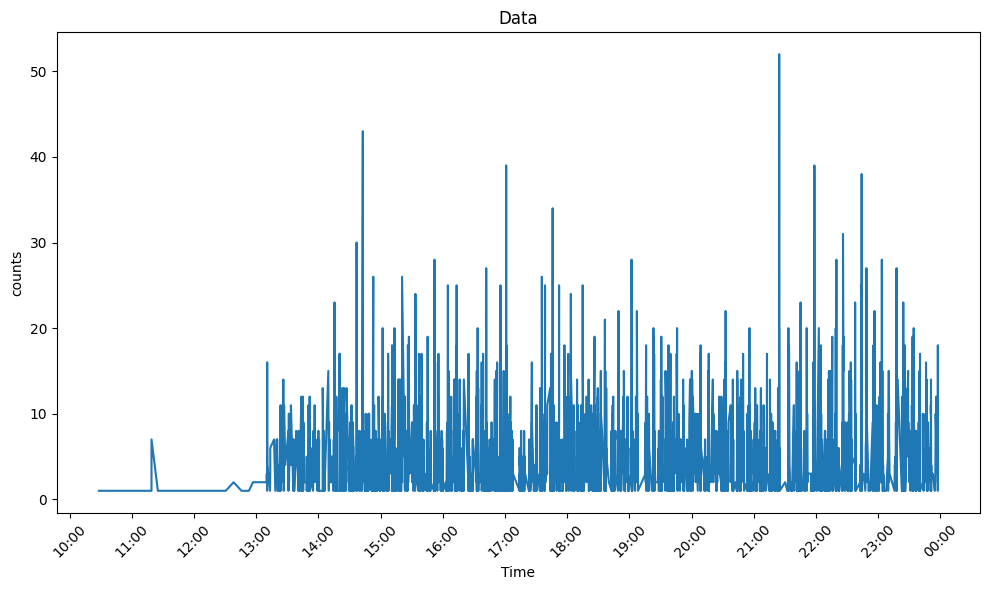

In [28]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(oct2020['loggedtime'], oct2020['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
ce5log_sbatch_date_returncode_group_df['dateHHMM'] = pd.to_datetime(ce5log_sbatch_date_returncode_group_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))

In [137]:
ce5log_sbatch_date_returncode_group_df

,loggedtime,count,dateHHMM
0,2020-10-16 11:43:45,3,2020-10-16 11:43:00
1,2020-10-16 11:43:46,2,2020-10-16 11:43:00
2,2020-10-16 11:43:54,1,2020-10-16 11:43:00
3,2020-10-16 22:21:13,1,2020-10-16 22:21:00
4,2020-10-16 22:21:33,1,2020-10-16 22:21:00
...,...,...,...
34171,2021-09-24 19:13:14,1,2021-09-24 19:13:00
34172,2021-09-24 20:16:31,1,2021-09-24 20:16:00
34173,2021-10-02 08:14:16,1,2021-10-02 08:14:00
34174,2021-10-02 17:28:16,1,2021-10-02 17:28:00


In [147]:
batchHHMM_df = ce5log_sbatch_date_returncode_group_df[['dateHHMM','count']].groupby('dateHHMM').sum('count').reset_index()

In [150]:
batchHHMM_df

,dateHHMM,count
0,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,9
3,2020-10-16 22:26:00,5
4,2020-10-16 22:33:00,21
...,...,...
10332,2021-09-24 19:13:00,1
10333,2021-09-24 20:16:00,1
10334,2021-10-02 08:14:00,1
10335,2021-10-02 17:28:00,1


In [154]:
batchHHMM_df[batchHHMM_df['count'] > 15]

,dateHHMM,count
4,2020-10-16 22:33:00,21
5,2020-10-16 22:37:00,60
6,2020-10-16 22:40:00,60
28,2020-10-18 09:35:00,25
31,2020-10-18 09:56:00,23
...,...,...
10199,2021-09-24 01:11:00,41
10200,2021-09-24 01:13:00,21
10203,2021-09-24 01:17:00,22
10209,2021-09-24 01:29:00,18


In [164]:
checkdf = batchHHMM_df[(
    (batchHHMM_df['dateHHMM'] >= '2021-08-11 00:00:00')
    &
    (batchHHMM_df['dateHHMM'] <= '2021-08-13 23:55:00')
)]
checkdf

,dateHHMM,count
7660,2021-08-11 10:28:00,1
7661,2021-08-11 11:19:00,8
7662,2021-08-11 11:25:00,1
7663,2021-08-11 11:32:00,1
7664,2021-08-11 12:30:00,1
...,...,...
9703,2021-08-13 13:21:00,41
9704,2021-08-13 16:17:00,1
9705,2021-08-13 16:22:00,1
9706,2021-08-13 17:17:00,1


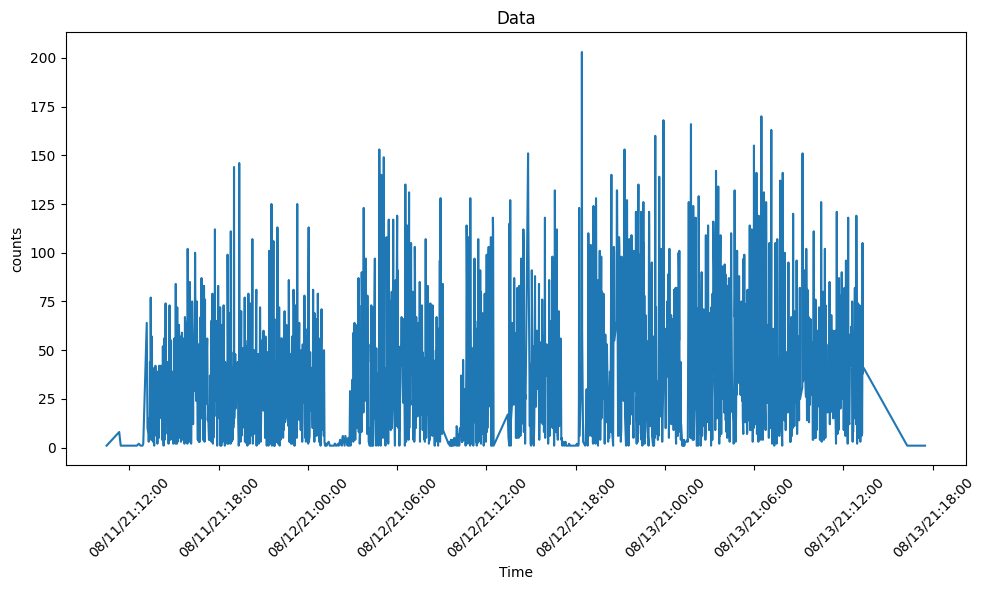

In [165]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
checkdf = ce5log_date_returncode_group_df[(
    (ce5log_date_returncode_group_df['loggedtime'] >= '2021-08-01 06:48:00')
    &
    (ce5log_date_returncode_group_df['loggedtime'] <= '2021-08-31 06:48:49')
)]
checkdf